In [1]:
import geopandas as gpd

In [2]:
df = gpd.read_file('D:/canopy_data/Kleinschroth_etal_2019_NatSust_data/Kleinschroth_etal_2019_NatSust_data.shp')

df.shape

(203681, 5)

In [3]:
df.head()

,class,concession,country,length,geometry
0,out_forest,0,Dem. Rep. Congo,2685,"LINESTRING (28.99773 -13.34388, 29.00755 -13.3..."
1,out_forest,0,Dem. Rep. Congo,2428,"LINESTRING (28.91454 -13.20009, 28.92601 -13.1..."
2,out_forest,0,Dem. Rep. Congo,1908,"LINESTRING (28.91454 -13.20009, 28.91259 -13.1..."
3,out_forest,0,Dem. Rep. Congo,5891,"LINESTRING (28.93289 -13.18889, 28.93445 -13.1..."
4,out_forest,0,Dem. Rep. Congo,1151,"LINESTRING (28.91632 -13.18385, 28.92663 -13.1..."


In [5]:
df2 = gpd.read_file('./data/logging_roads_filter_1/logging_roads_filter_1.shp')

df2.head()

,osm_id,access,bridge,end_date,ferry,ford,highway,informal,maxspeed,name,...,seasonal,smoothness,source,start_date,surface,trail_visi,tunnel,width,st_length_,geometry
0,434414192,forestry,None,NaN,None,None,track,None,None,None,...,None,None,CIRAD;Landsat,2012,None,None,None,None,1586.780615,"LINESTRING (1821522.498 225672.522, 1823099.12..."
1,48546134,forestry,None,NaN,None,None,track,None,None,None,...,None,None,WRI;DIAF,before 2000,None,None,None,None,5238.822084,"LINESTRING (2516620.512 280324.690, 2516623.39..."
2,48546140,forestry,None,NaN,None,None,track,None,None,None,...,None,None,WRI;DIAF;Africover,before 2000,None,None,None,None,1822.612375,"LINESTRING (2515830.177 271673.728, 2514009.10..."
3,48546161,forestry,None,NaN,None,None,track,None,None,None,...,None,None,WRI;DIAF;Africover,before 2000,None,None,None,None,4032.470445,"LINESTRING (2537953.000 295370.806, 2537895.67..."
4,48834657,forestry,None,NaN,None,None,track,None,None,None,...,None,None,Landsat;WRI,None,None,None,None,None,6308.324269,"LINESTRING (2026013.586 268184.703, 2026029.70..."


In [16]:
df3 = df[df['concession'] == True]
df3['concession'].value_counts()

1    54039
Name: concession, dtype: int64

In [17]:
df3.head()

,class,concession,country,length,geometry
23468,new_open,1,Dem. Rep. Congo,1162,"LINESTRING (22.37931 -5.52973, 22.37088 -5.52348)"
23527,new_open,1,Dem. Rep. Congo,12,"LINESTRING (22.37085 -5.52357, 22.37088 -5.52348)"
23694,out_forest,1,Dem. Rep. Congo,780,"LINESTRING (13.03683 -5.57111, 13.03780 -5.56413)"
23728,new_open,1,Dem. Rep. Congo,1113,"LINESTRING (13.04466 -5.57191, 13.05469 -5.57131)"
23729,new_open,1,Dem. Rep. Congo,3372,"LINESTRING (13.05469 -5.57131, 13.05758 -5.571..."


In [7]:
df4 = df2.merge(df3, on='geometry')

df4.head()

,osm_id,access,bridge,end_date,ferry,ford,highway,informal,maxspeed,name,...,surface,trail_visi,tunnel,width,st_length_,geometry,class,concession,country,length


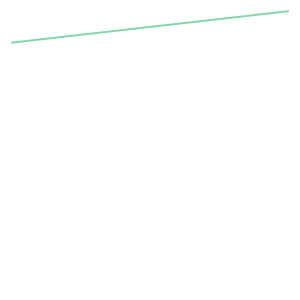

In [9]:
df2.loc[0, 'geometry']

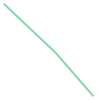

In [10]:
df3.loc[0, 'geometry']

In [11]:
type(df2.loc[0, 'geometry'])

shapely.geometry.linestring.LineString

In [18]:
df4 = gpd.sjoin(df2.to_crs('EPSG:4326'), df3, how="inner", op='intersects')

df4.head()

,osm_id,access,bridge,end_date,ferry,ford,highway,informal,maxspeed,name,...,trail_visi,tunnel,width,st_length_,geometry,index_right,class,concession,country,length
0,434414192,forestry,None,NaN,None,None,track,None,None,None,...,None,None,None,1586.780615,"LINESTRING (16.36302 2.02683, 16.37718 2.02844)",110991,old_abando,1,Rep. Congo,521
0,434414192,forestry,None,NaN,None,None,track,None,None,None,...,None,None,None,1586.780615,"LINESTRING (16.36302 2.02683, 16.37718 2.02844)",110994,old_abando,1,Rep. Congo,1451
4,48834657,forestry,None,NaN,None,None,track,None,None,None,...,None,None,None,6308.324269,"LINESTRING (18.19999 2.40843, 18.20013 2.40888...",116442,new_open,1,Rep. Congo,2043
4,48834657,forestry,None,NaN,None,None,track,None,None,None,...,None,None,None,6308.324269,"LINESTRING (18.19999 2.40843, 18.20013 2.40888...",116443,old_open,1,Rep. Congo,8362
11046,338874181,forestry,None,NaN,None,None,track,None,None,None,...,None,None,None,16376.182278,"LINESTRING (18.20661 2.45990, 18.20642 2.46061...",116443,old_open,1,Rep. Congo,8362


In [19]:
df4.shape

(12775, 30)

In [20]:
df4.to_file('./data/test3/test3.shp')